In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import mean_squared_error,accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [42]:
df=pd.read_csv("bankadditional.csv")
df1=pd.read_csv("bankfull.csv")

In [43]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [44]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [45]:
df.shape

(4119, 21)

In [46]:
df1.shape

(41188, 21)

In [47]:
data=pd.concat([df,df1],ignore_index=True)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [48]:
##SHAPE OF  DATA IS ROW : 45307
# COLUMN : 21
data.shape

(45307, 21)

In [49]:
## INFORMATION
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45307 entries, 0 to 45306
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45307 non-null  int64  
 1   job             45307 non-null  object 
 2   marital         45307 non-null  object 
 3   education       45307 non-null  object 
 4   default         45307 non-null  object 
 5   housing         45307 non-null  object 
 6   loan            45307 non-null  object 
 7   contact         45307 non-null  object 
 8   month           45307 non-null  object 
 9   day_of_week     45307 non-null  object 
 10  duration        45307 non-null  int64  
 11  campaign        45307 non-null  int64  
 12  pdays           45307 non-null  int64  
 13  previous        45307 non-null  int64  
 14  poutcome        45307 non-null  object 
 15  emp.var.rate    45307 non-null  float64
 16  cons.price.idx  45307 non-null  float64
 17  cons.conf.idx   45307 non-null 

In [50]:
num=data.select_dtypes(include=np.number).columns
num

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [51]:
cat=data.select_dtypes(include="object").columns
cat

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [52]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000
mean,40.032203,258.148917,2.564835,962.288785,0.174543,0.082166,93.576032,-40.502282,3.621297,5166.985525
std,10.411407,258.864200,2.752261,187.370863,0.499364,1.570231,0.578881,4.625101,1.734350,72.380791
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [53]:
## THERE IS NO MISSING VALUE
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

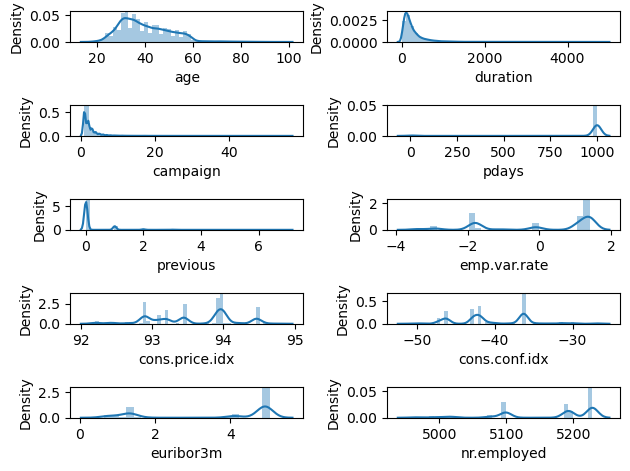

In [54]:
## UNIVARIATE ANALYSIS
t=1
for i in num:
    plt.subplot(5,2,t)
    sns.distplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

In [55]:
## OBSERVATION
#AGE ,DURATION,CAMPAIGN,PREVIOUS IS RIGHT LEFT.
#  PDAYS IS LEFT SKEW.
# IN EURIBORN3M HIGHEST DENSITY IS 2.5

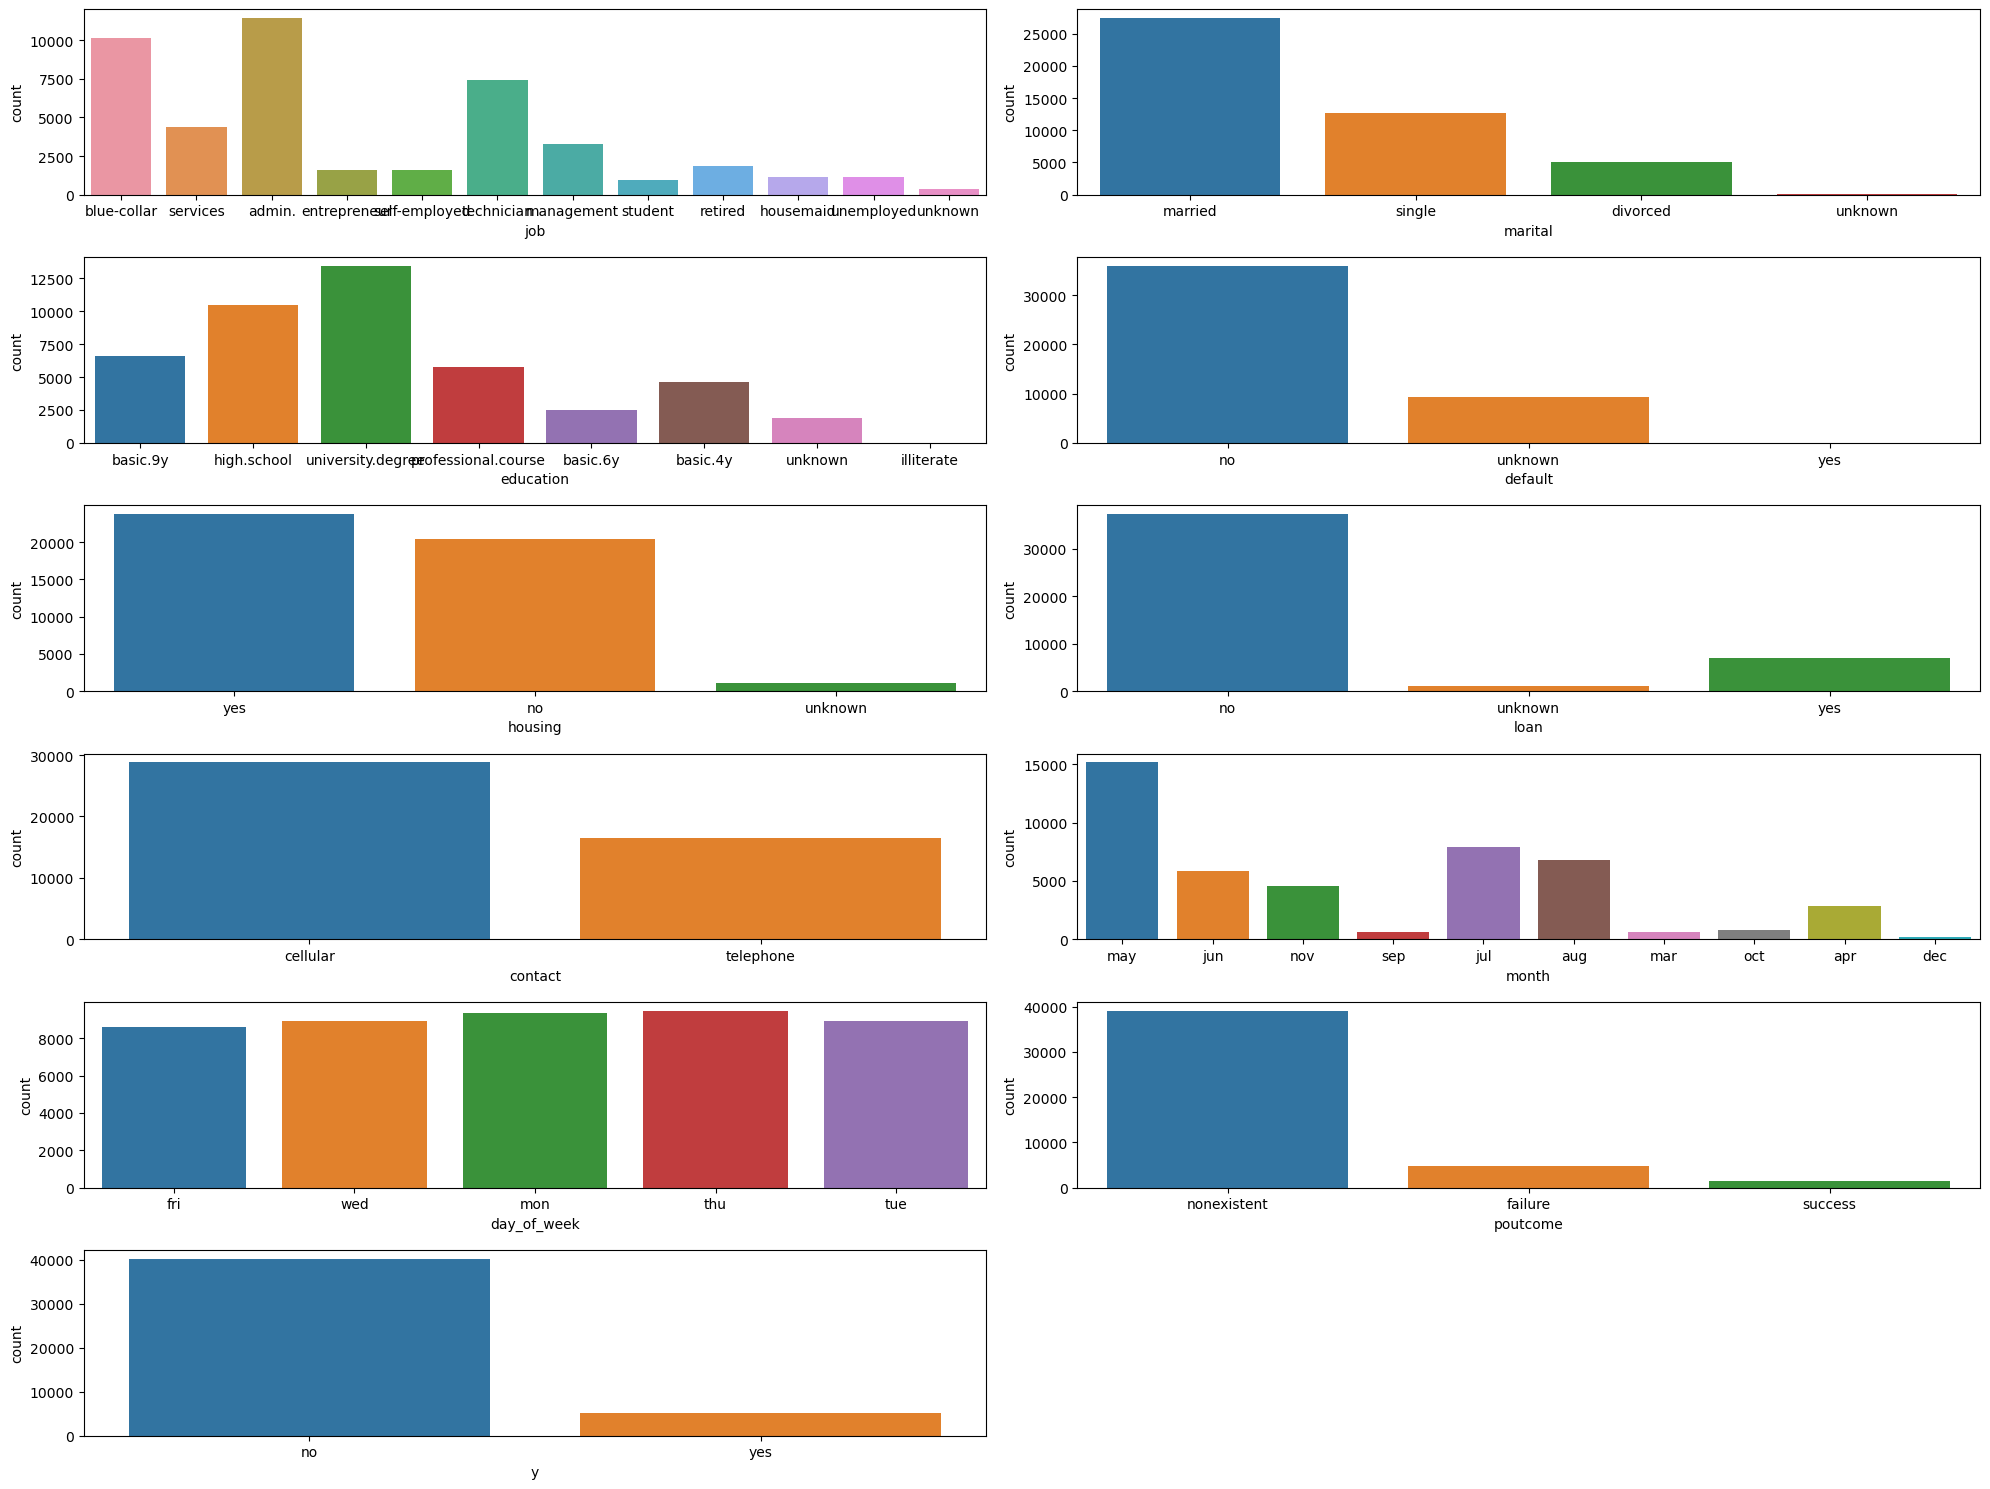

In [56]:
t=1
plt.figure(figsize=(20,15))
for i in cat:
    plt.subplot(6,2,t)
    sns.countplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

In [57]:
cat

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

<Axes: xlabel='marital', ylabel='age'>

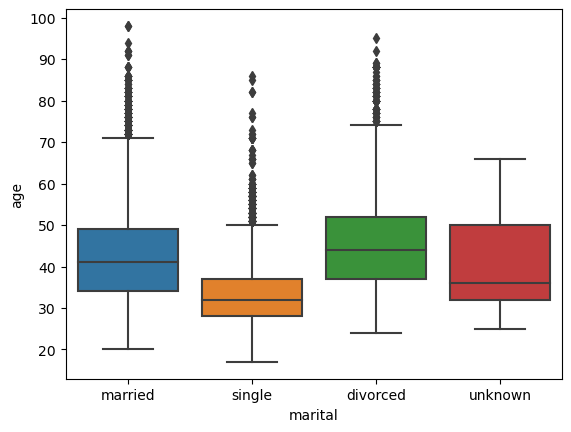

In [58]:
sns.boxplot(data=data, x='marital', y='age')

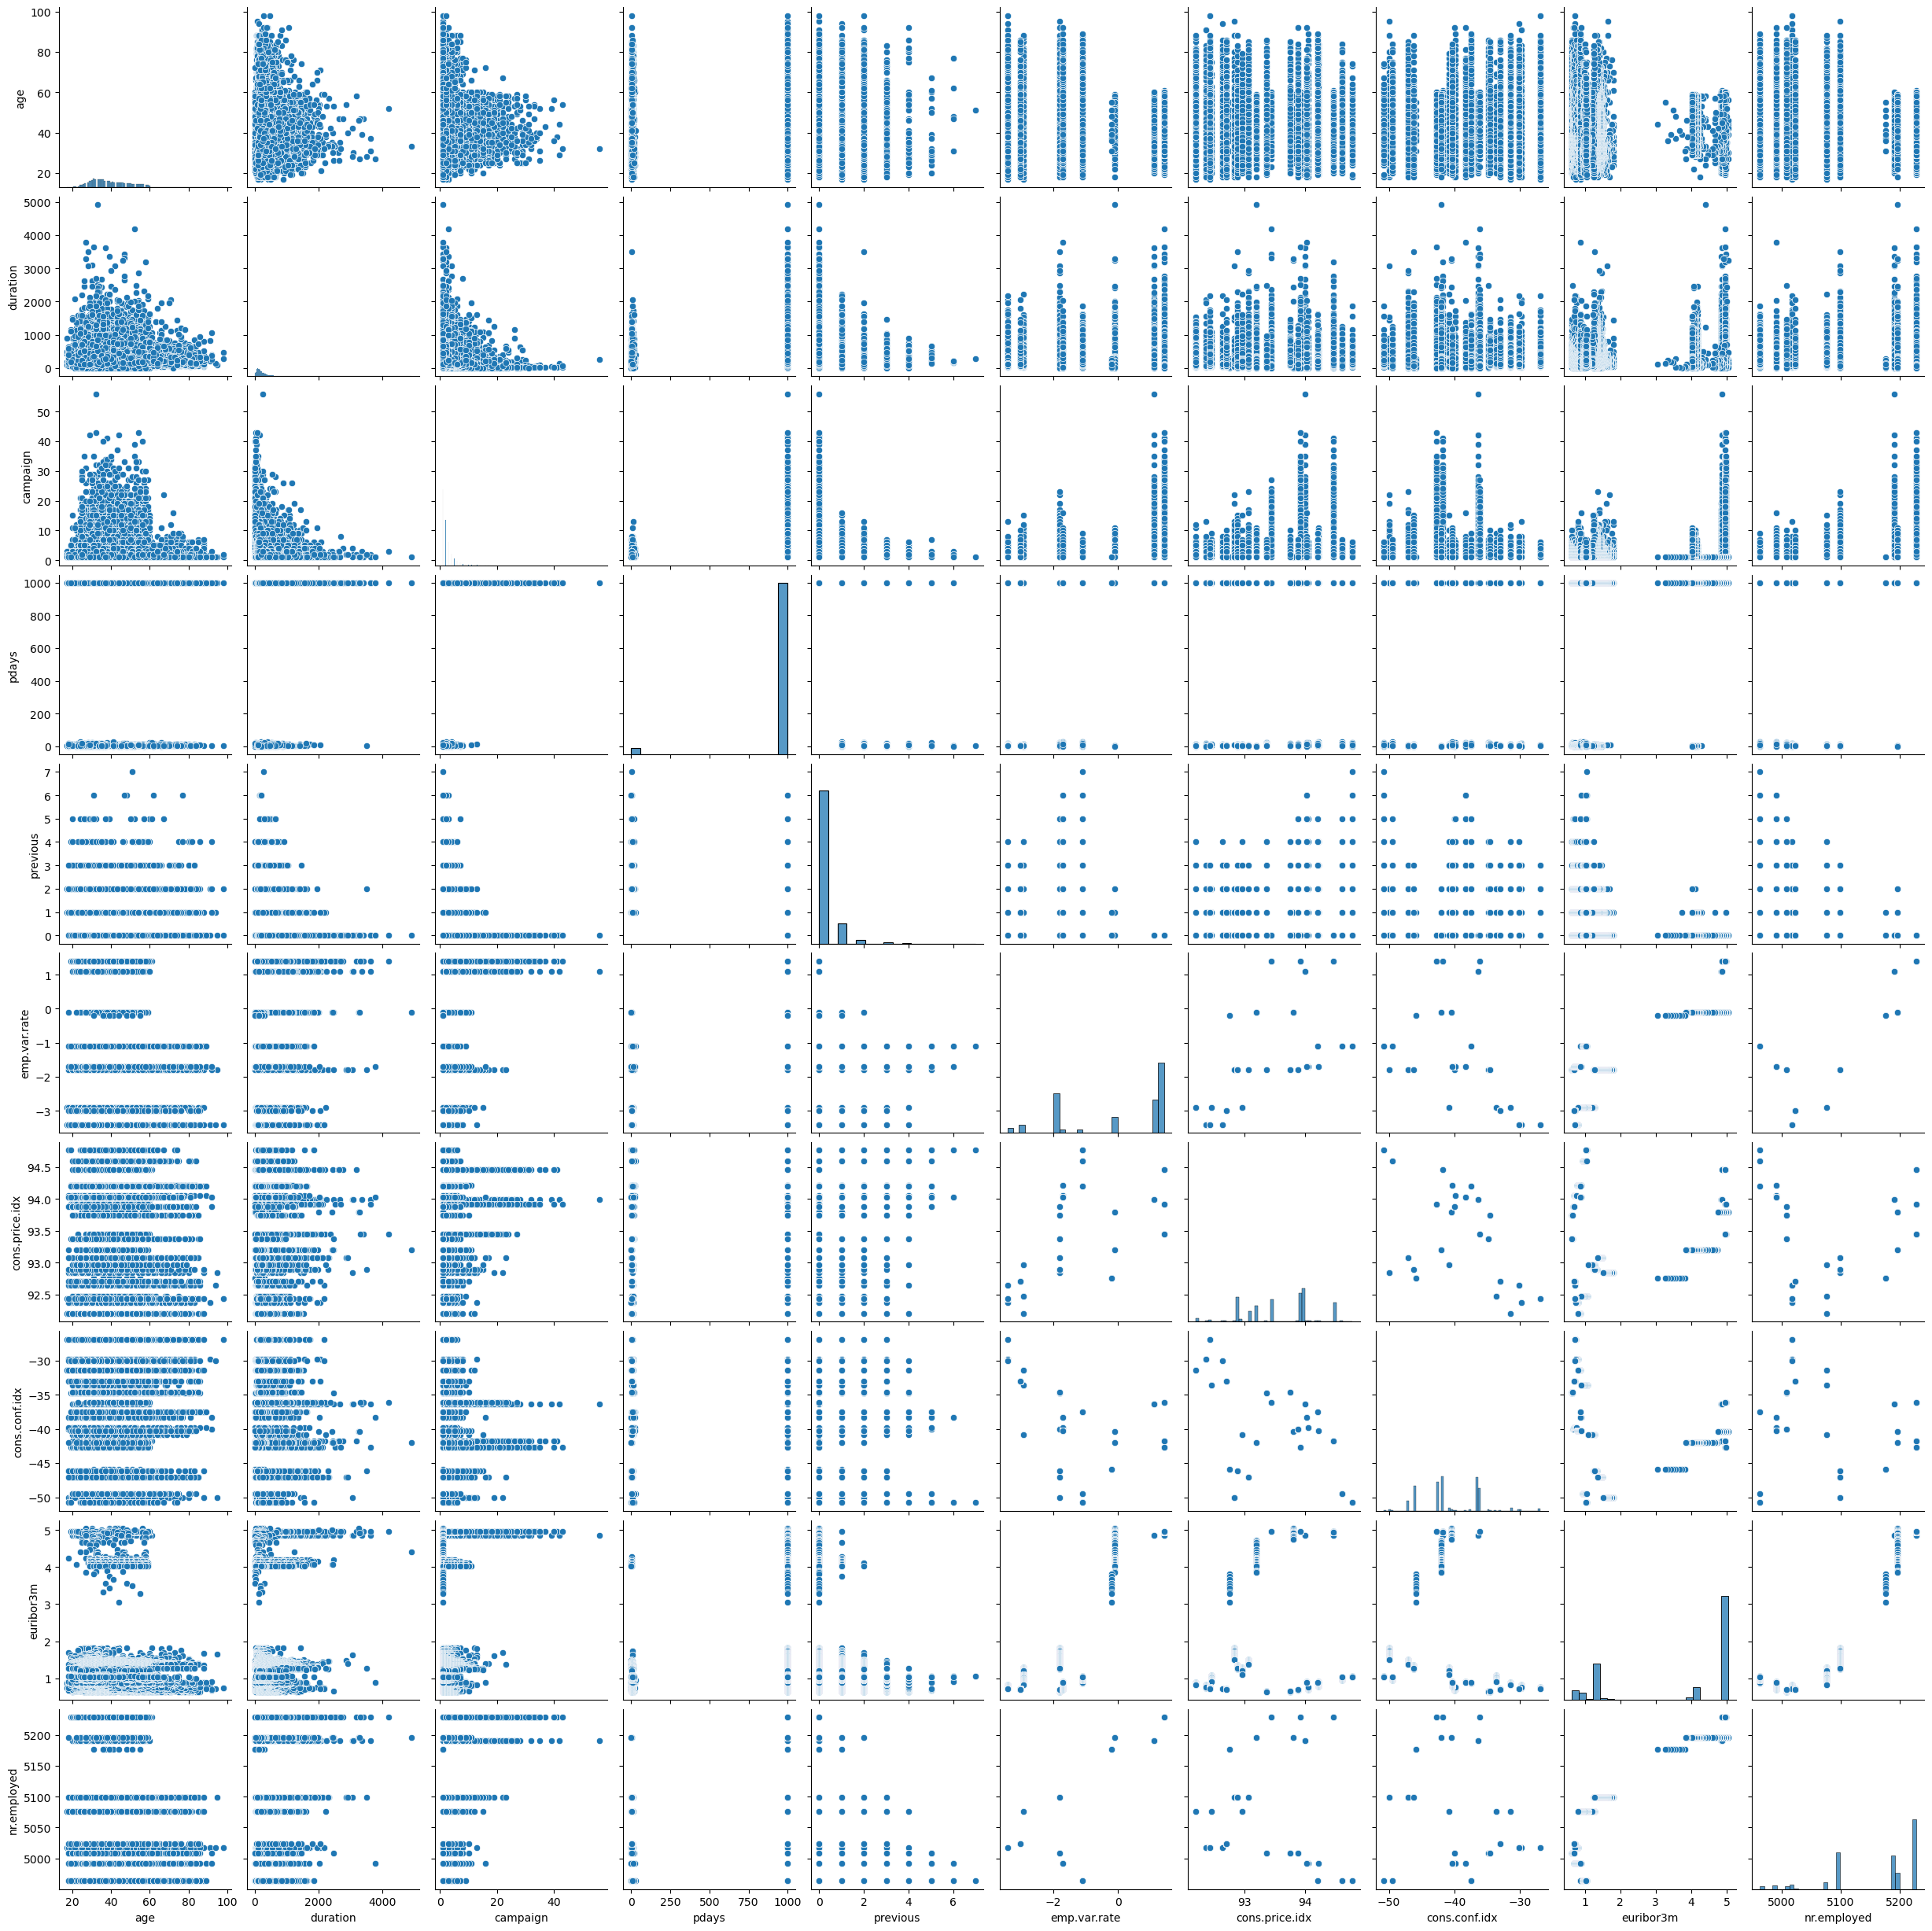

In [59]:
sns.pairplot(data)

<Axes: xlabel='job', ylabel='count'>

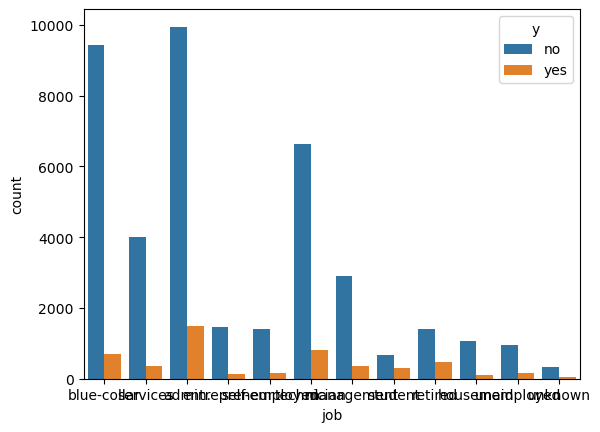

In [60]:
 sns.countplot(x= 'job', hue = 'y', data=data)

<Axes: >

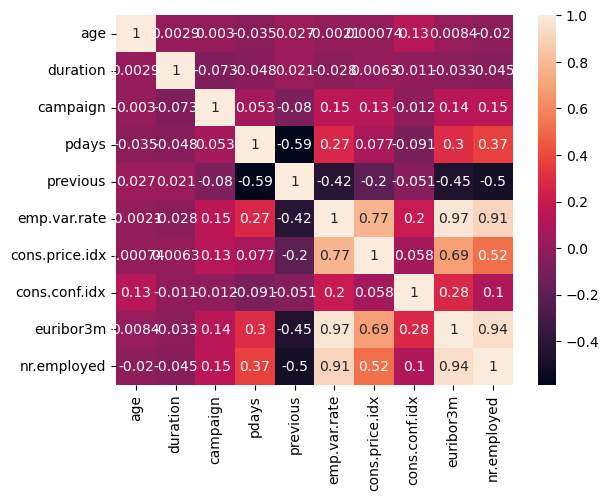

In [61]:
sns.heatmap(data.corr(),annot=True)

In [62]:
data.skew()

age               0.778537
duration          3.265940
campaign          4.709701
pdays            -4.908171
previous          3.859534
emp.var.rate     -0.724401
cons.price.idx   -0.229578
cons.conf.idx     0.301756
euribor3m        -0.709699
nr.employed      -1.047371
dtype: float64

In [63]:
## ENCODING
# convert categorical into numerical.

In [64]:
cat

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [65]:
#Apply label encoding to categorical columns

In [66]:
label_encoder = LabelEncoder()
for column in cat:
    data[column] = label_encoder.fit_transform(data[column])

In [67]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [68]:
data["y"].value_counts() 


0    40216
1     5091
Name: y, dtype: int64

In [69]:
## data is imbalance 

In [70]:
## DATA SPLITTING

In [71]:
X = data.drop(columns=['y'])  
y = data['y']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
print(X_train.shape)
print(X_test.shape)
print("y_train",y_train.shape)
print(y_test.shape)

(36245, 20)
(9062, 20)
y_train (36245,)
(9062,)


In [ ]:
# MODELLING

In [ ]:
# RANDOM FOREST CLASSIFICATION

In [77]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print(classification_report(y_test,rf_pred))
print("the overall accuracy is :",accuracy_score(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7940
           1       0.74      0.57      0.64      1122

    accuracy                           0.92      9062
   macro avg       0.84      0.77      0.80      9062
weighted avg       0.92      0.92      0.92      9062

the overall accuracy is : 0.9216508497020526


In [ ]:
## DECISION TREE

In [78]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
print(classification_report(y_test,dt_pred))
print("the overall accuracy is :",accuracy_score(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7940
           1       0.60      0.57      0.59      1122

    accuracy                           0.90      9062
   macro avg       0.77      0.76      0.76      9062
weighted avg       0.90      0.90      0.90      9062

the overall accuracy is : 0.8998013683513573


In [79]:
print("recall is:",recall_score(y_test,dt_pred))

recall is: 0.5739750445632799


In [80]:
print("f1 score is:",f1_score(y_test,dt_pred))

f1 score is: 0.5865209471766849
